## Introduction

The purpose of this project is to perform a data visualization analysis on the sentiment of tweets related to "Kitkat" 
and to explore whether there is any correlation between the sentiment of tweets and the stock market of company producing 
'Kitkat' i.e. 'Nestle'. KitKat is a chocolate-covered wafer bar confection, and we want to explore how and why people's sentiment towards this brand has changed over time and if it has any impact on the stock market.

## Data Exploration

We obtained the tweet data using Twitter's API, and the stock market data was collected from Yahoo Finance. We extracted 
tweets containing the keyword related to "Kitkat" from 2010 to 2023 and used natural language processing techniques to perform 
sentiment analysis on the tweets. The sentiment analysis classified the tweets into positive, negative, or neutral categories 
based on the sentiment expressed in the tweet.

Next, we explored how the sentiment of tweets changed over time. We created wordclouds and line plots to visualize the 
sentiment trends over time and identified any major spikes or dips in sentiment as well as stock market. We also analyzed 
whether certain events or trends affected the sentiment of tweets towards Kitkat, such as the introduction of new flavors or 
packaging, or any negative news related to the brand.

In [66]:
# Importing all the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS

import itertools
from scipy.stats import pearsonr

In [67]:
# Read the dataset after all the required preprocessing is performed 
df = pd.read_csv('Nestle Preprocessed.csv') # this is the overall nestle dataset
df.head()

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Month,Day,polarity
0,30-12-2010,love nestl tvc realli awesom,0,0,366,2010,12,30,positive
1,30-12-2010,rt loreal continu work nestl time analyst pond...,0,0,17221,2010,12,30,neutral
2,29-12-2010,hot nestl nesquik 125 coupon printablecoupon c...,0,1,7771,2010,12,29,positive
3,28-12-2010,oatmeal scotchi best cooki ever nestl,0,0,1811,2010,12,28,positive
4,28-12-2010,rt us muslim new consum nich nestl increas hal...,0,1,3291,2010,12,28,positive


In [68]:
df = df.drop(['Month', 'Day', 'polarity'],axis=1)

In [69]:
# Filter the rows containing the keyword "smarti"
kitkat = df[df['Text'].str.contains('kitkat', case=False)] # extract dataset of tweets that contain 'smarti' in it

In [70]:
# import the Natural Language Toolkit (nltk) library
import nltk
#nltk.download('vader_lexicon')

# import the SentimentIntensityAnalyzer class from the vader module in the nltk.sentiment package to perform sentiment analysis on text.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize VADER
sid = SentimentIntensityAnalyzer()

# define a function to get the sentiment score for each tweet
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# apply the function to the 'text' column and create a new 'sentiment_score' column for 'maggi' dataset
kitkat['Sentiment Score'] = kitkat['Text'].apply(get_sentiment_score)

C:\Users\HP\AppData\Local\Temp/ipykernel_9236/3775990864.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kitkat['Sentiment Score'] = kitkat['Text'].apply(get_sentiment_score)


In [71]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# map the sentiment scores to categories and create a new 'category' column
kitkat['Polarity'] = kitkat['Sentiment Score'].apply(get_sentiment_category)

kitkat.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_9236/3069479436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kitkat['Polarity'] = kitkat['Sentiment Score'].apply(get_sentiment_category)


,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity
10,25-12-2010,fag agenc team made tht kitkat ad featur two s...,0,0,575,2010,-0.8271,Negative
22,22-12-2010,sweet success kitkatcampaign nestl chang polic...,0,0,144,2010,0.5106,Positive
94,13-12-2010,break kitkat forgot dam tasi littl thing choco...,0,0,792,2010,0.0000,Neutral
107,09-12-2010,what differ kitkat get four finger kit kat nestl,0,0,1783,2010,0.0000,Neutral
153,02-12-2010,common stock ens part 1 nestl celebr kitkat 75...,0,0,196,2010,0.0000,Neutral


In [72]:
# Get the value_counts for all 3 categories of 'Polarity'
kitkat['Polarity'].value_counts()

Neutral     6986
Positive    6245
Negative    1529
Name: Polarity, dtype: int64

In [73]:
# eliminate the tweets with 'Neutral' sentiment and to focus analysis on the tweets that have a stronger emotional content
kitkat = kitkat[kitkat['Polarity']!='Neutral']

In [74]:
# convert the 'Date' column of the 'maggi' DataFrame to a datetime format using the pandas to_datetime() method
kitkat['Date'] = pd.to_datetime(kitkat['Date'])

In [75]:
# Extract the year from the Date column
kitkat['Year'] = kitkat['Date'].dt.year

### Yearly Line plot of polarity from 2010-2023

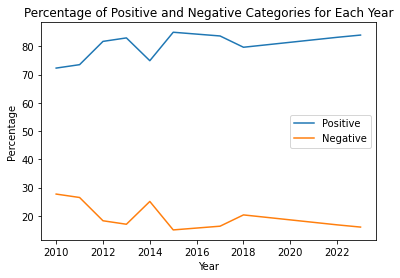

In [76]:
# group the 'maggi' DataFrame by 'Year' and counts the number of tweets in each year using the groupby() and count() methods.
total_counts = kitkat.groupby('Year')['Polarity'].count()

# calculates the percentage of positive and negative tweets for each year by filtering the 'maggi' DataFrame based on the 'Polarity' column and applying the groupby() and count() methods
positive_perc = kitkat[kitkat['Polarity'] == 'Positive'].groupby('Year')['Polarity'].count() / total_counts * 100
negative_perc = kitkat[kitkat['Polarity'] == 'Negative'].groupby('Year')['Polarity'].count() / total_counts * 100

# Plot the percentages of positive and negative tweets for each year
plt.plot(positive_perc.index, positive_perc.values, label='Positive')
plt.plot(negative_perc.index, negative_perc.values, label='Negative')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Positive and Negative Categories for Each Year')
plt.legend()

# Show the plot
plt.show() 

# Negative sentiment is high and positive is low in 2014 and 2018

In [78]:
positive_perc

Year
2010    72.324723
2011    73.535354
2012    81.785064
2013    83.018868
2014    74.943567
2015    85.026738
2017    83.707865
2018    79.708029
2022    83.230769
2023    84.023669
Name: Polarity, dtype: float64

### Monthly Line plot for polarity from 2010-2023

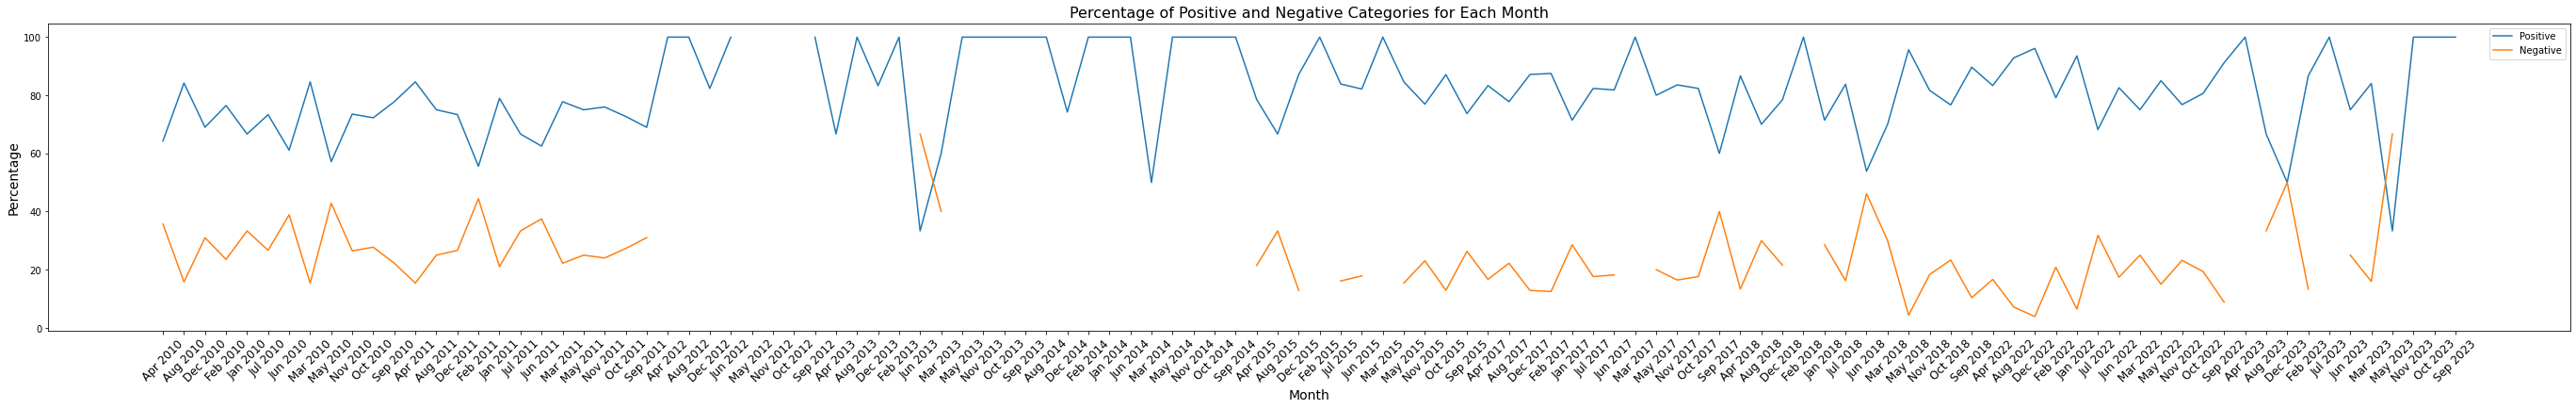

In [13]:
# Convert the Date column to a pandas datetime object
kitkat['Date'] = pd.to_datetime(kitkat['Date'], format='%d-%m-%Y')

# Create new columns for the year and month
kitkat['Year'] = kitkat['Date'].dt.year
kitkat['Month'] = kitkat['Date'].dt.strftime('%b %Y')

# Calculate the total count of tweets for each year and month
total_counts = kitkat.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = kitkat[kitkat['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = kitkat[kitkat['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(48,6))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Percentage of Positive and Negative Categories for Each Month', fontsize=16)
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.legend()

# Show the plot
plt.show()

### Monthly Line plot for polarity from 2013-2015

C:\Users\HP\AppData\Local\Temp/ipykernel_9236/3526787177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kitkat_2013_2015['Year'] = kitkat_2013_2015['Date'].dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_9236/3526787177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kitkat_2013_2015['Month'] = kitkat_2013_2015['Date'].dt.strftime('%b %Y')


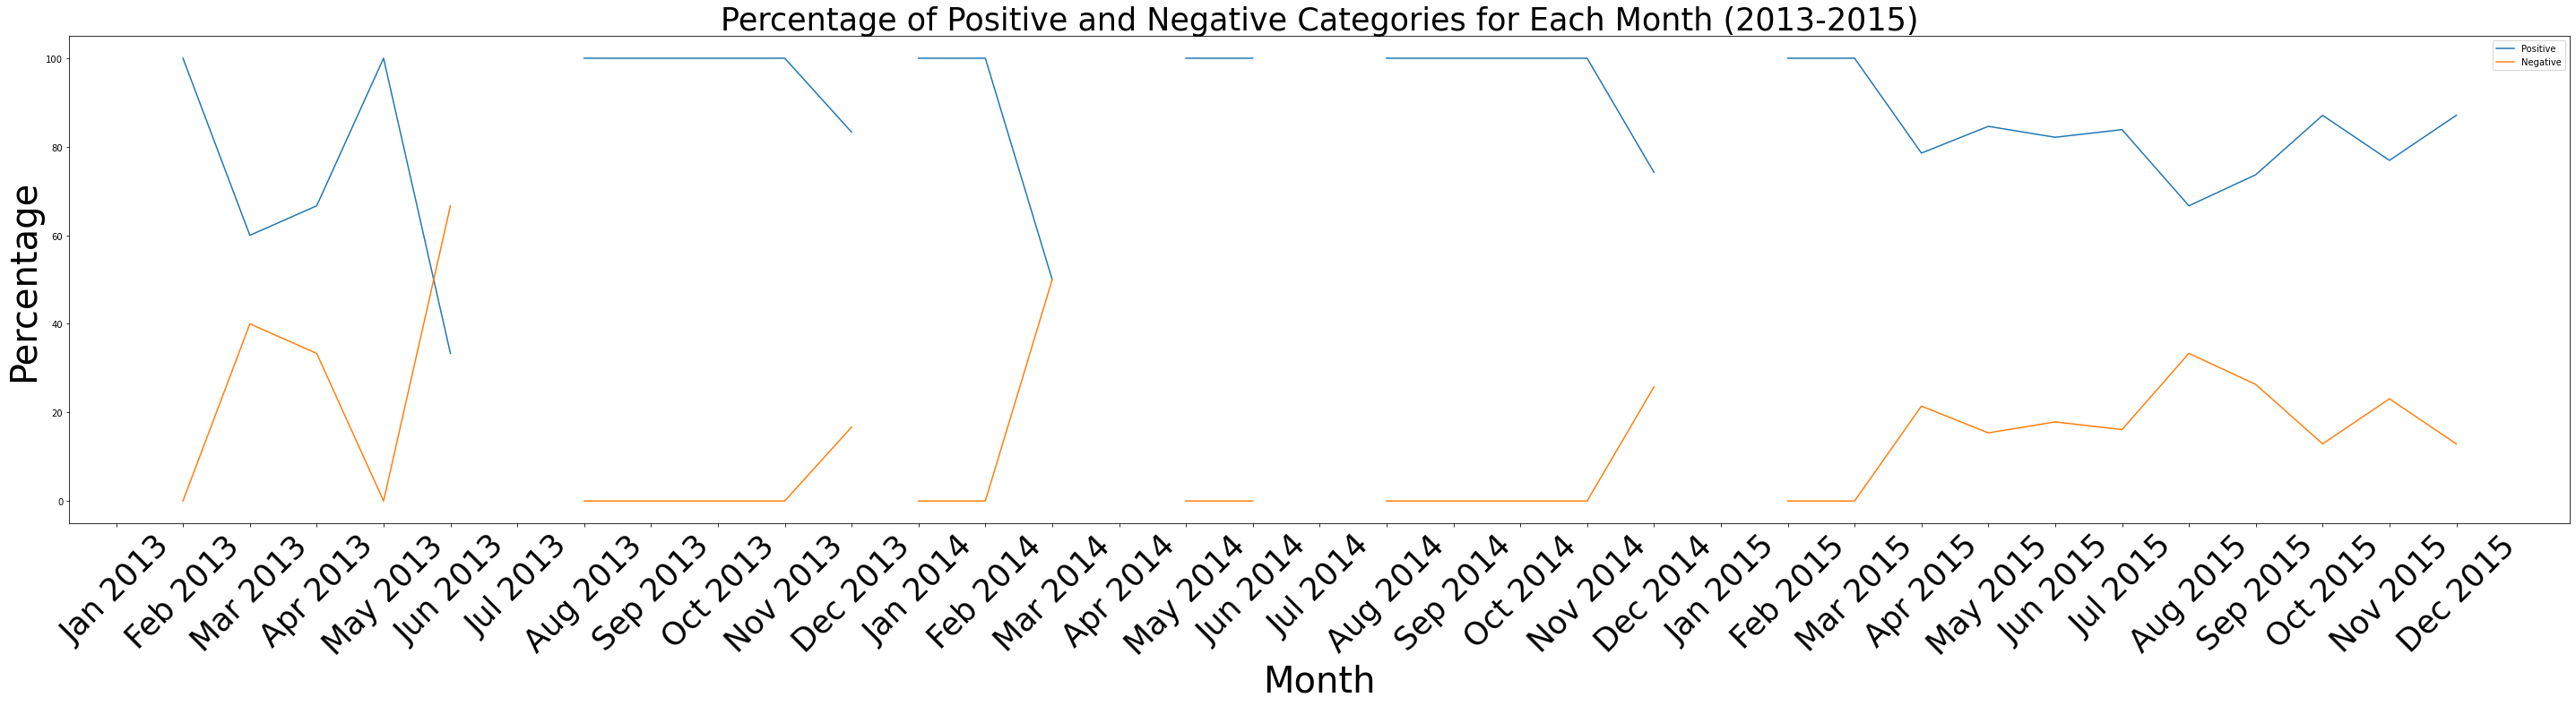

In [14]:
# Filter the data for years 2013-2013
kitkat_2013_2015 = kitkat[(kitkat['Year'] >= 2013) & (kitkat['Year'] <= 2015)]

# Create new columns for the year and month
kitkat_2013_2015['Year'] = kitkat_2013_2015['Date'].dt.year
kitkat_2013_2015['Month'] = kitkat_2013_2015['Date'].dt.strftime('%b %Y')

# Define a categorical data type for the month column with the correct order of months
month_order = ['Jan 2013', 'Feb 2013', 'Mar 2013', 'Apr 2013', 'May 2013', 'Jun 2013', 'Jul 2013', 'Aug 2013', 'Sep 2013', 'Oct 2013', 'Nov 2013', 'Dec 2013',
              'Jan 2014', 'Feb 2014', 'Mar 2014', 'Apr 2014', 'May 2014', 'Jun 2014', 'Jul 2014', 'Aug 2014', 'Sep 2014', 'Oct 2014', 'Nov 2014', 'Dec 2014',
              'Jan 2015', 'Feb 2015', 'Mar 2015', 'Apr 2015', 'May 2015', 'Jun 2015', 'Jul 2015', 'Aug 2015', 'Sep 2015', 'Oct 2015', 'Nov 2015', 'Dec 2015']
month_cat = pd.Categorical(kitkat_2013_2015['Month'], categories=month_order, ordered=True)

# Convert the Month column to the categorical data type with the correct ordering
kitkat_2013_2015 = kitkat_2013_2015.assign(Month=month_cat)

# Calculate the total count of tweets for each year and month
total_counts = kitkat_2013_2015.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = kitkat_2013_2015[kitkat_2013_2015['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = kitkat_2013_2015[kitkat_2013_2015['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(50,10))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=40)
ax.set_ylabel('Percentage', fontsize=40)
ax.set_title('Percentage of Positive and Negative Categories for Each Month (2013-2015)', fontsize=35)
ax.tick_params(axis='x', labelrotation=45, labelsize=35)
ax.legend()

# Show the plot
plt.show() 

# In 2013, Nestle faced a lawsuit in the US alleging that the company knowingly used cocoa produced by child and slave labor in its products, including KitKat.
# In 2014, Nestle faced criticism in the United Kingdom after it was revealed that some KitKat Chunky bars contained traces of horsemeat.
# In 2015, Nestle faced a lawsuit in the United States over allegations that it had misled consumers by labeling its products as fair trade certified, despite the use of cocoa from uncertified sources in KitKat bars.

# The rise in the negative sentiment between 2013 to 2015 may be a result of these issues in the UK and US.

### Latent Dirichlet Allocation (LDA) for tweets from 2013-2015

In [15]:
# Filter tweets between 2010-2013
kitkat_2013_2015 = kitkat[(kitkat['Year'] >= 2013) & (kitkat['Year'] <= 2015)]

# Preprocess text data
preprocessed_data = []
for text in kitkat_2013_2015['Text']:
    tokens = word_tokenize(text.lower())
    preprocessed_data.append(tokens)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Define the number of topics to extract
num_topics = 2

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print("Topic:", topic_id)
    for word, weight in topic:
        print("\t", word, ":", weight)
# LDA to identify the topics that were most prevalent in the tweets during 2014-16, and then analyze those topics to determine what people's major concerns were during that time.

Topic: 0
	 kitkat : 0.08899052
	 love : 0.01926574
	 chocol : 0.017715393
	 smarti : 0.014903274
	 sweet : 0.011787505
	 famili : 0.008110203
	 thank : 0.0079878215
	 perfect : 0.00785329
	 kat : 0.0075552785
	 coffeecrisp : 0.0075186593
Topic: 1
	 kitkat : 0.11072491
	 christma : 0.014546098
	 love : 0.0131559335
	 break : 0.011311851
	 ad : 0.0094689345
	 android : 0.009349326
	 best : 0.008055246
	 japan : 0.008028919
	 chocol : 0.0074105845
	 second : 0.0073303147


### Monthly Line plot for polarity in 2018

C:\Users\HP\AppData\Local\Temp/ipykernel_9236/1515290273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kitkat_2018['Year'] = kitkat_2018['Date'].dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_9236/1515290273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kitkat_2018['Month'] = kitkat_2018['Date'].dt.strftime('%b %Y')


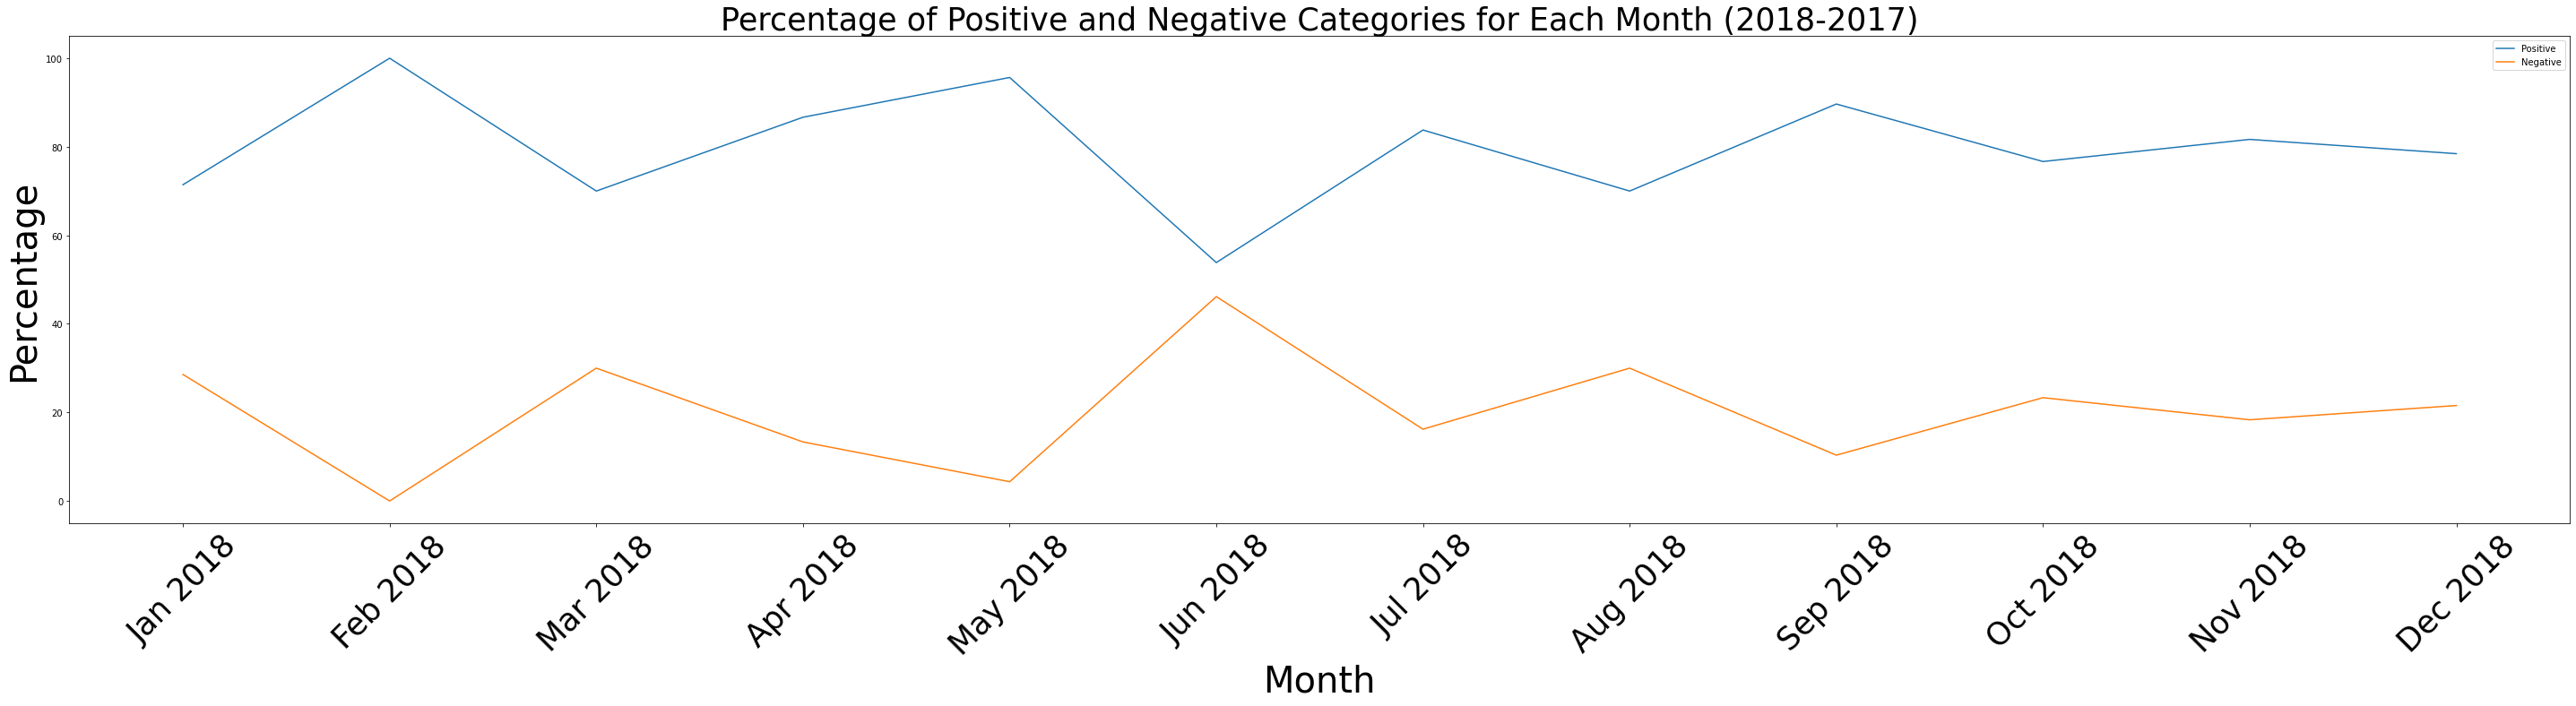

In [16]:
# Filter the data for years 2018-2017
kitkat_2018 = kitkat[(kitkat['Year'] == 2018)]

# Create new columns for the year and month
kitkat_2018['Year'] = kitkat_2018['Date'].dt.year
kitkat_2018['Month'] = kitkat_2018['Date'].dt.strftime('%b %Y')

# Define a categorical data type for the month column with the correct order of months
month_order = ['Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018',]
month_cat = pd.Categorical(kitkat_2018['Month'], categories=month_order, ordered=True)

# Convert the Month column to the categorical data type with the correct ordering
kitkat_2018 = kitkat_2018.assign(Month=month_cat)

# Calculate the total count of tweets for each year and month
total_counts = kitkat_2018.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = kitkat_2018[kitkat_2018['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = kitkat_2018[kitkat_2018['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(50,10))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=40)
ax.set_ylabel('Percentage', fontsize=40)
ax.set_title('Percentage of Positive and Negative Categories for Each Month (2018-2017)', fontsize=35)
ax.tick_params(axis='x', labelrotation=45, labelsize=35)
ax.legend()

# Show the plot
plt.show()

# In 2018, Nestle faced criticism in the US for non-recyclable packaging in some products, including KitKat.
# In 2018, Nestle also faced a lawsuit from a group of consumers in the United States over the alleged use of forced labor in its supply chain.
# It is possible that the crtiscism, lawsuit and concerns over forced labor in Nestle's supply chain could have had an impact on consumer sentiment toward all Nestle products, including kitkat.

# In 2018, there was a recall of KitKat bars in Japan due to the discovery of plastic pieces in some of the bars.

### Latent Dirichlet Allocation (LDA) for tweets in 2018

In [17]:
# Filter tweets for 2018
kitkat_2018 = kitkat[(kitkat['Year'] == 2018)]

# Preprocess text data
preprocessed_data = []
for text in kitkat_2018['Text']:
    tokens = word_tokenize(text.lower())
    preprocessed_data.append(tokens)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Define the number of topics to extract
num_topics = 2

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print("Topic:", topic_id)
    for word, weight in topic:
        print("\t", word, ":", weight)


Topic: 0
	 kitkat : 0.090695694
	 chocol : 0.012687193
	 nestl : 0.01162131
	 thank : 0.008218669
	 one : 0.007929234
	 click : 0.006520512
	 love : 0.0063227625
	 best : 0.0061739767
	 trial : 0.0061476766
	 sweet : 0.005746597
Topic: 1
	 kitkat : 0.055431183
	 chocol : 0.02628925
	 nestl : 0.017680382
	 kat : 0.012335395
	 kit : 0.012294933
	 best : 0.011475254
	 japan : 0.011222927
	 candi : 0.00929492
	 amp : 0.008969035
	 flavour : 0.006560709


### WORDCLOUD for Overall Text

In [18]:
# convert the data type of the 'Text' column in the 'kitkat' dataframe to a string, and assigns it to a new column called 'text'
kitkat['text'] = kitkat['Text'].astype(str)

# create new string variable called 'text' by joining all the strings in the 'text' column together using a space as a separator
text = ' '.join(kitkat['text'])

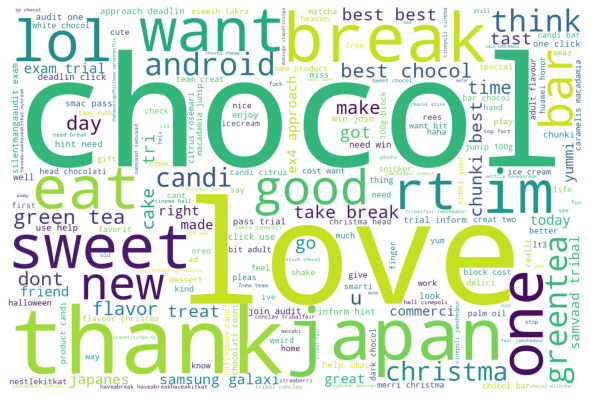

In [19]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "kitkat", "nestl", "nestle" and "amp"
stopwords.add('kitkat')
stopwords.add('kit')
stopwords.add('kat')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('amp') # amp refers to the HTML entity for an ampersand (&)


# generate a WordCloud object with the updated stopwords
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1200, height=800).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off') # turns off the axis display
plt.tight_layout(pad=0) # ets the layout to be tight

plt.show()

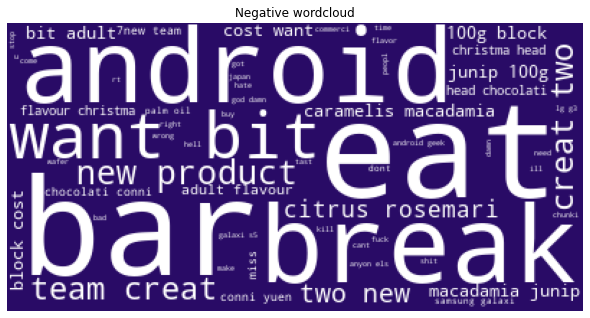

In [61]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "smarti", "nestl", "nestle" and "amp"
stopwords.add('kitkat')
stopwords.add('kit')
stopwords.add('kat')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('amp') # amp refers to the HTML entity for an ampersand (&)
stopwords.add('go')
stopwords.add('im')
stopwords.add('one')
stopwords.add('candi')
stopwords.add('chocol')

# Set the background color to dark blue
background_color = '#290B66'

# Set the text color to white
text_color = 'white'

# Set the maximum number of words to 40
max_words = 60


# generate a WordCloud object with the updated stopwords
#wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1200, height=800).generate(text)

wordcloud = WordCloud(stopwords=stopwords, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(kitkat[kitkat['Polarity']=='Negative']['Text'].str.cat(sep=" "))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off') # turns off the axis display
plt.tight_layout(pad=0) # ets the layout to be tight
plt.title('Negative wordcloud')
plt.show()

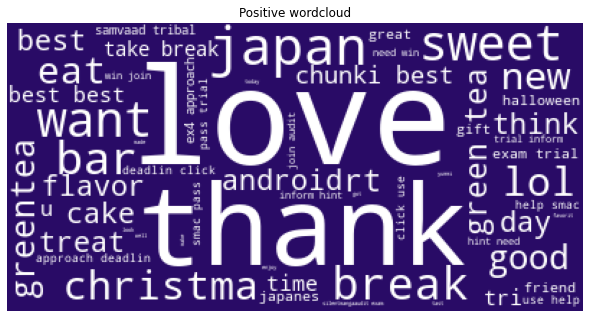

In [63]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "smarti", "nestl", "nestle" and "amp"
stopwords.add('kitkat')
stopwords.add('kit')
stopwords.add('kat')
stopwords.add('nestle')
stopwords.add('nestl')
stopwords.add('amp') # amp refers to the HTML entity for an ampersand (&)
stopwords.add('go')
stopwords.add('im')
stopwords.add('one')
stopwords.add('candi')
stopwords.add('chocol')

# Set the background color to dark blue
background_color = '#290B66'

# Set the text color to white
text_color = 'white'

# Set the maximum number of words to 40
max_words = 60


# generate a WordCloud object with the updated stopwords
#wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1200, height=800).generate(text)

wordcloud = WordCloud(stopwords=stopwords, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(kitkat[kitkat['Polarity']=='Positive']['Text'].str.cat(sep=" "))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off') # turns off the axis display
plt.tight_layout(pad=0) # ets the layout to be tight
plt.title('Positive wordcloud')
plt.show()

### Positive and Negative Wordcloud

In [20]:
# create positive_data by selecting rows from kitkat where the 'Polarity' column is equal to the string 'Positive'
positive_data = kitkat[kitkat['Polarity'] == 'Positive']

# create negative_data by selecting rows from kitkat where the 'Polarity' column is equal to the string 'Negative'
negative_data = kitkat[kitkat['Polarity'] == 'Negative']

# Combine the text data for each category into a single string
positive_text = ' '.join(positive_data['Text'])
negative_text = ' '.join(negative_data['Text'])

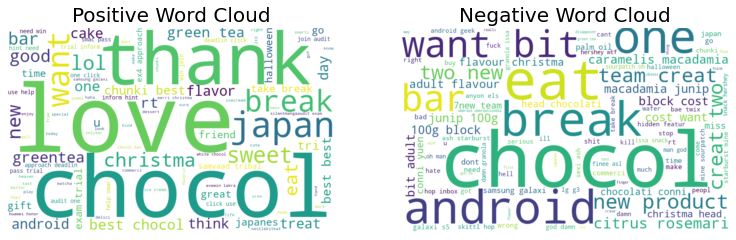

In [21]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "kitkat", "nestl", "nestle" and "amp"
stopwords.add('kitkat')
stopwords.add('kit')
stopwords.add('kat')
stopwords.add('candi')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('amp')
stopwords.add('im')

# Generate the word clouds for each category with updated stopwords
positive_wordcloud = WordCloud(stopwords=stopwords,width=800, height=500, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(positive_text)
negative_wordcloud = WordCloud(stopwords=stopwords,width=800, height=500, background_color='white', max_words=100, contour_width=3, contour_color='firebrick').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud', fontsize=20)

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud', fontsize=20)

plt.show()

# In 2013, Nestle partnered with Google to name the latest version of the Android operating system as "Android KitKat" to promote the chocolate brand.
# In 2016, Nestle successfully trademarked the tagline "Have a Break" for KitKat after a long legal battle with Cadbury.

### DAILY DATA

In [22]:
kitkat.head(3)

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity,Month,text
10,2010-12-25,fag agenc team made tht kitkat ad featur two s...,0,0,575,2010,-0.8271,Negative,Dec 2010,fag agenc team made tht kitkat ad featur two s...
22,2010-12-22,sweet success kitkatcampaign nestl chang polic...,0,0,144,2010,0.5106,Positive,Dec 2010,sweet success kitkatcampaign nestl chang polic...
247,2010-11-13,admit kitkathol kitkat nestl,0,0,728,2010,0.2023,Positive,Nov 2010,admit kitkathol kitkat nestl


In [23]:
# convert the 'Date' column to datetime format
kitkat['Date'] = pd.to_datetime(kitkat['Date'])

# group the tweets by day and count the number of tweets on each day
tweet_count = kitkat.groupby(kitkat['Date'].dt.date).size().reset_index(name='count')

print(type(tweet_count))

<class 'pandas.core.frame.DataFrame'>


In [24]:
min = tweet_count.min()
max = tweet_count.max()
mean = tweet_count.mean()

print('Minimum count :',min,'Maximum count :', max,'Mean count :',mean)

Minimum count : Date     2010-01-10
count             1
dtype: object Maximum count : Date     2023-12-03
count           104
dtype: object Mean count : count    13.52
dtype: float64


C:\Users\HP\AppData\Local\Temp/ipykernel_9236/3620070332.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = tweet_count.mean()


In [25]:
# calculates the weighted sentiment score for each tweet based on the sentiment score and the follower count of the user who posted the tweet
kitkat['Weighted_Sentiment_Score'] = kitkat['Sentiment Score'] * (kitkat['Follower Count'])
kitkat.head(3)

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity,Month,text,Weighted_Sentiment_Score
10,2010-12-25,fag agenc team made tht kitkat ad featur two s...,0,0,575,2010,-0.8271,Negative,Dec 2010,fag agenc team made tht kitkat ad featur two s...,-475.5825
22,2010-12-22,sweet success kitkatcampaign nestl chang polic...,0,0,144,2010,0.5106,Positive,Dec 2010,sweet success kitkatcampaign nestl chang polic...,73.5264
247,2010-11-13,admit kitkathol kitkat nestl,0,0,728,2010,0.2023,Positive,Nov 2010,admit kitkathol kitkat nestl,147.2744


In [26]:
# Group the data by day 
daily_data = kitkat.groupby(kitkat['Date'].dt.date).agg({'Weighted_Sentiment_Score': 'sum', 'Like Count': 'sum', 'Retweet Count': 'sum', 'Follower Count': 'sum'}).reset_index()

# calculate the weighted average sentiment score for each day based on the follower counts
daily_data['Daily_Avg_Sentiment_Score'] = daily_data['Weighted_Sentiment_Score'] /(daily_data['Follower Count'])

# Print the resulting dataframe
daily_data.head()

,Date,Weighted_Sentiment_Score,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score
0,2010-01-10,-101.3708,0,0,4051,-0.025024
1,2010-01-11,-19584.6620,0,0,63919,-0.306398
2,2010-01-12,38316.3650,1,1,96320,0.397803
3,2010-02-10,972.6560,0,0,2120,0.458800
4,2010-02-11,2231.0657,0,1,12014,0.185705


In [27]:
# Calculate tweet volume
tweet_vol = kitkat.groupby(kitkat['Date'].dt.date).size().reset_index(name='Tweet Volume')
tweet_vol.head(3)

,Date,Tweet Volume
0,2010-01-10,4
1,2010-01-11,7
2,2010-01-12,10


In [28]:
# Merge tweet volume data with daily_data
daily_data = daily_data.merge(tweet_vol, on='Date', how='left')

daily_data.head()

,Date,Weighted_Sentiment_Score,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-01-10,-101.3708,0,0,4051,-0.025024,4
1,2010-01-11,-19584.6620,0,0,63919,-0.306398,7
2,2010-01-12,38316.3650,1,1,96320,0.397803,10
3,2010-02-10,972.6560,0,0,2120,0.458800,1
4,2010-02-11,2231.0657,0,1,12014,0.185705,10


In [29]:
# Drop the column 'Weighted_Sentiment_Score'
daily = daily_data.drop('Weighted_Sentiment_Score', axis=1)
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-01-10,0,0,4051,-0.025024,4
1,2010-01-11,0,0,63919,-0.306398,7
2,2010-01-12,1,1,96320,0.397803,10
3,2010-02-10,0,0,2120,0.458800,1
4,2010-02-11,0,1,12014,0.185705,10


In [30]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# map the sentiment scores to categories and create a new 'category' column
daily['Polarity'] = daily['Daily_Avg_Sentiment_Score'].apply(get_sentiment_category)

# print the first 10 rows of the dataframe to verify the results
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume,Polarity
0,2010-01-10,0,0,4051,-0.025024,4,Neutral
1,2010-01-11,0,0,63919,-0.306398,7,Negative
2,2010-01-12,1,1,96320,0.397803,10,Positive
3,2010-02-10,0,0,2120,0.458800,1,Positive
4,2010-02-11,0,1,12014,0.185705,10,Positive


In [31]:
# Value_count for each category of 'Polarity'
daily['Polarity'].value_counts()

Positive    484
Negative     72
Neutral      19
Name: Polarity, dtype: int64

In [32]:
# eliminate the tweets with 'Neutral' sentiment and to focus analysis on the tweets that have a stronger emotional content
daily = daily[daily['Polarity']!='Neutral']
daily['Polarity'].value_counts()

Positive    484
Negative     72
Name: Polarity, dtype: int64

<AxesSubplot:xlabel='Year'>

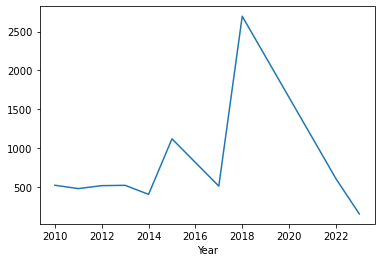

In [79]:
# Create a column for Year
daily['Year'] = pd.DatetimeIndex(daily['Date']).year

# Group the data by year, and calculates the total number of tweets per year using the 'Tweet Volume' column
yearly_tweet_volume = daily.groupby(['Year'])['Tweet Volume'].sum()

# Create a line plot of the yearly tweet volume
yearly_tweet_volume.plot() # There was a huge spike in tweet volume in 2015 when 'Maggi' was banned

In [81]:
yearly_tweet_volume

Year
2010     526
2011     483
2012     521
2013     525
2014     409
2015    1122
2017     515
2018    2696
2022     612
2023     158
Name: Tweet Volume, dtype: int64

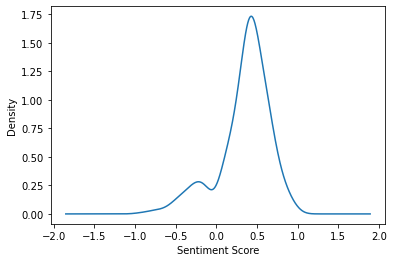

In [80]:
# Plot the distribution of sentiment scores in a density plot
daily['Daily_Avg_Sentiment_Score'].plot(kind='density')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

## NESTLE UK  STOCKS

In [35]:
# KitKat is particularly popular in Japan, where it has a wide variety of unique flavors not found in other countries. 
# Nestle is traded on the Tokyo Stock Exchange under the ticker symbol 2502.

In [36]:
import yfinance as yf

In [37]:
# Set the start and end date for the data
start_date = '2010-01-01'
end_date = '2023-03-28'

# Retrieve historical stock data for Nestle
nestle_data = yf.download('2501.T', start=start_date, end=end_date)

nestle = pd.DataFrame(nestle_data)
nestle.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2565.0,2615.0,2545.0,2575.0,2028.022217,61200
2010-01-05,2625.0,2625.0,2560.0,2565.0,2020.146973,110600
2010-01-06,2625.0,2660.0,2595.0,2640.0,2079.214844,188600
2010-01-07,2665.0,2665.0,2610.0,2650.0,2087.091064,113000
2010-01-08,2705.0,2755.0,2700.0,2755.0,2169.787109,419600


In [38]:
# resulting object, nestle_yearly, will contain the mean closing prices of Nestle stock for each year in the original data
nestle_yearly = nestle['Close'].resample(rule='A').mean()

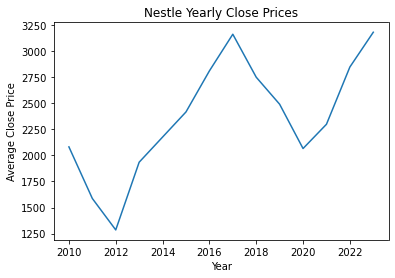

In [39]:
# create a line plot of the resampled Nestle stock closing prices
plt.plot(nestle_yearly.index.year, nestle_yearly.values)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Nestle Yearly Close Prices')
plt.show() 

# There was minor decrease in stock value in 2015 correspoding to the negative sentiment.
# No significant decrease can be noted otherwise

In [40]:
# In 2012, Nestle Japan faced a food safety scandal when excessive levels of chlorine were found in some products, leading to recalls and criticism. The company apologized and improved quality control measures.
# These products were baby formula and noodle products, hence the issue was unrelated to kitkat

In [41]:
# In 2018, there was a recall of KitKat bars in Japan due to the discovery of plastic pieces in some of the bars. The company apologized for the incident and offered refunds to affected customers. 
# In 2019, Nestle Japan faced a fine of 19 million yen (approximately $175,000 USD) for false advertising regarding the nutritional benefits of its infant formula products. The company again apologized and stated that it would take steps to improve its advertising practices.

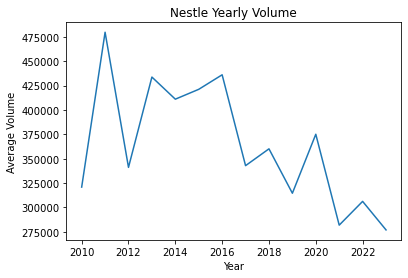

In [42]:
# resample the trading volume of Nestle stock on a yearly basis and computes the average trading volume for each year
nestle_yearlyvol = nestle['Volume'].resample(rule='A').mean()

# plot the resampled values of the average trading volume on the y-axis and the years on the x-axis
plt.plot(nestle_yearlyvol.index.year, nestle_yearlyvol.values)

plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.title('Nestle Yearly Volume')
plt.show() 
# There was a major drop in volume of Nestle stock in 2011, and 2017. Some, but not all of these dates correspond to issues related to Smarties.

In [43]:
# The decrease in Nestle's stock volume in 2021 could be due to various reasons such as the COVID-19 pandemic and the resulting economic slowdown, changes in government policies, fluctuations in the stock market, and changes in consumer preferences. 

# COMBINING TWITTER AND STOCK DATA

In [44]:
# Removing 'Date' column as the index and checking its data type

nestle_data = nestle_data.reset_index()
nestle_data['Date'].dtype

dtype('<M8[ns]')

In [45]:
# convert the data type of 'Date' column to datetime.
daily['Date'] = pd.to_datetime(daily['Date'])

# check the data type of the 'Date' column again
print(daily['Date'].dtype)

datetime64[ns]


In [46]:
# Merge tweet and stocks data to form a single dataset.
stock = pd.merge(daily,nestle_data, on='Date')
stock.columns

Index(['Date', 'Like Count', 'Retweet Count', 'Follower Count',
       'Daily_Avg_Sentiment_Score', 'Tweet Volume', 'Polarity', 'Year', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [47]:
# Remove unwanted columns from the dataset.
# Adj. CLose price and volume are the only relevant stock data for the study.
stock = stock.drop(['Open', 'High', 'Low', 'Close'], axis=1)

In [48]:
# Calculating Price difference between two days using the Adj. Closing price.
stock['Price Difference'] = stock['Adj Close'].diff()
stock.dropna(inplace=True)

# Adding column 'Stock Trend' where value is 1 when price difference > 0, and 0 otherwise.
Rise = 1
Fall = 0

stock['Stock Trend'] = np.where(stock['Price Difference']>0, Rise, Fall)

In [49]:
# Converting the categorical column ' Polarity' into numeric using encoding.
stock['Polarity'] = stock["Polarity"].map({"Positive": 1, "Negative": 0})
stock.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume,Polarity,Year,Adj Close,Volume,Price Difference,Stock Trend
1,2010-02-10,0,0,2120,0.458800,1,1,2010,1779.934448,164000,-346.535278,0
2,2010-02-12,0,0,3368,-0.353361,6,0,2010,1839.002808,231400,59.068359,1
3,2010-03-08,0,0,982,0.077200,2,1,2010,1839.002808,209000,0.000000,0
4,2010-03-10,0,0,24701,0.721089,2,1,2010,1783.872437,167400,-55.130371,0
5,2010-03-11,0,1,2201,0.237954,4,1,2010,1823.251221,249400,39.378784,1


## CORRELATION ANALYSIS

In [50]:
# Checking the relationship between variables. Particularly checking what variables have a significant correlation coefficient.

In [51]:
# define a list of variables that are of interest in the dataset
variables = ['Like Count', 'Retweet Count', 'Follower Count',
       'Daily_Avg_Sentiment_Score', 'Tweet Volume', 'Polarity', 'Year',
       'Adj Close', 'Volume', 'Price Difference', 'Stock Trend']
# compute the Pearson correlation coefficient and p-value for all possible pairs of variables in a dataset
for var1, var2 in itertools.combinations(variables, 2): #  itertools.combinations() function to iterate over all possible pairs of variables in the variables list.
    corr_coef, p_value = pearsonr(stock[var1], stock[var2])
    # prints the results for pairs with a statistically significant correlation (i.e., p-value less than 0.05).
    if p_value < 0.05:
        print(var1 + ' and ' + var2 + ': correlation coefficient = {:.2f}, p-value = {:.2f}'.format(corr_coef, p_value))

Like Count and Retweet Count: correlation coefficient = 0.51, p-value = 0.00
Like Count and Follower Count: correlation coefficient = 0.38, p-value = 0.00
Like Count and Daily_Avg_Sentiment_Score: correlation coefficient = 0.10, p-value = 0.04
Like Count and Tweet Volume: correlation coefficient = 0.40, p-value = 0.00
Like Count and Polarity: correlation coefficient = 0.10, p-value = 0.05
Like Count and Year: correlation coefficient = 0.28, p-value = 0.00
Like Count and Adj Close: correlation coefficient = 0.23, p-value = 0.00
Retweet Count and Follower Count: correlation coefficient = 0.34, p-value = 0.00
Retweet Count and Tweet Volume: correlation coefficient = 0.28, p-value = 0.00
Follower Count and Tweet Volume: correlation coefficient = 0.34, p-value = 0.00
Daily_Avg_Sentiment_Score and Tweet Volume: correlation coefficient = 0.12, p-value = 0.02
Daily_Avg_Sentiment_Score and Polarity: correlation coefficient = 0.80, p-value = 0.00
Daily_Avg_Sentiment_Score and Year: correlation c